<a href="https://colab.research.google.com/github/bhanuprabhas/Hackathon-2021-by-ineuron/blob/main/Mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset=pd.read_csv(r'/content/gdrive/My Drive/hackathon/train[1].csv')

dataset


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data=dataset.copy()

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]


In [ ]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  21


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
px_feature = [feature for feature in numerical_features if 'px' in feature]

px_feature

['px_height', 'px_width']

In [ ]:
for feature in px_feature:
    print(feature, dataset[feature].unique())

px_height [  20  905 1263 ...  528  915  483]
px_width [ 756 1988 1716 ...  743 1890 1632]


Text(0.5, 1.0, 'battery_power vs ram')

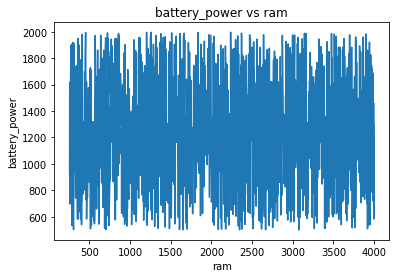

In [ ]:
dataset.groupby('ram')['battery_power'].median().plot()
plt.xlabel('ram')
plt.ylabel('battery_power')
plt.title("battery_power vs ram")

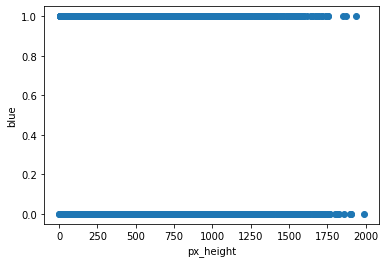

In [ ]:
for feature in px_feature:
    if feature!='px_width':
        data=dataset.copy()
        data[feature]=data['px_width']-data[feature]

        plt.scatter(data[feature],data['blue'])
        plt.xlabel(feature)
        plt.ylabel('blue')
        plt.show()

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in px_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [ ]:
discrete_feature

['blue',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [ ]:
dataset[discrete_feature].head()

,blue,dual_sim,fc,four_g,m_dep,n_cores,pc,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,1,0,0.6,2,2,9,7,19,0,0,1,1
1,1,1,0,1,0.7,3,6,17,3,7,1,1,0,2
2,1,1,2,1,0.9,5,6,11,2,9,1,1,0,2
3,1,0,0,0,0.8,6,9,16,8,11,1,0,0,2
4,1,0,13,1,0.6,2,14,8,2,15,1,1,0,1


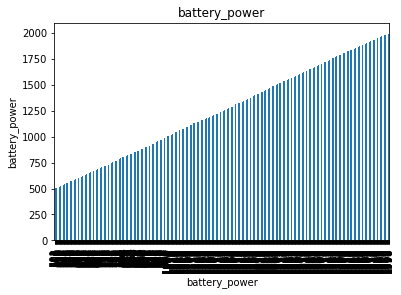

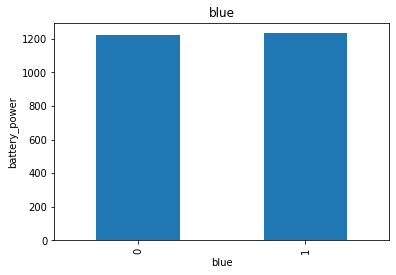

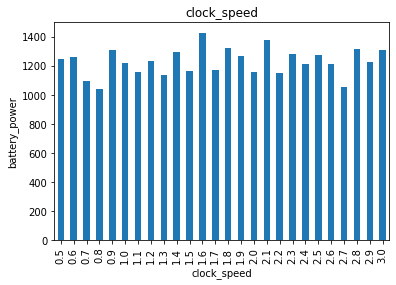

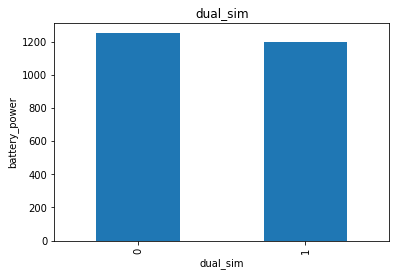

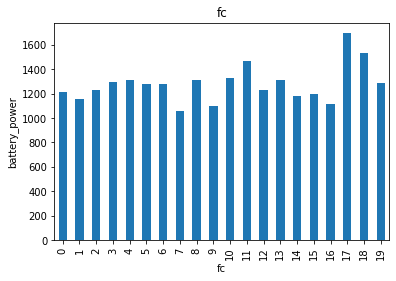

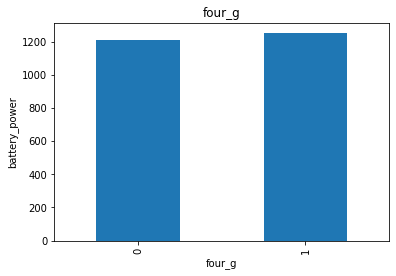

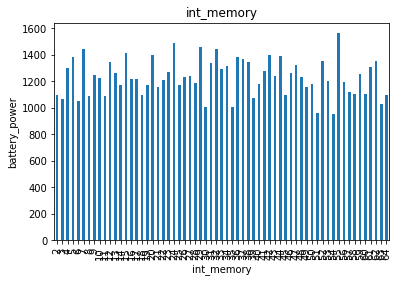

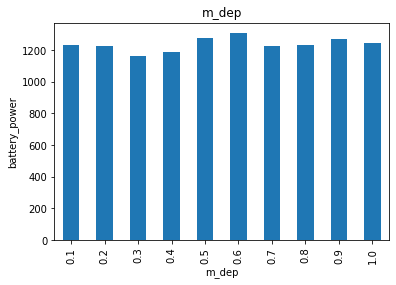

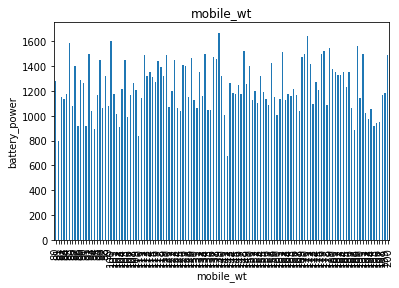

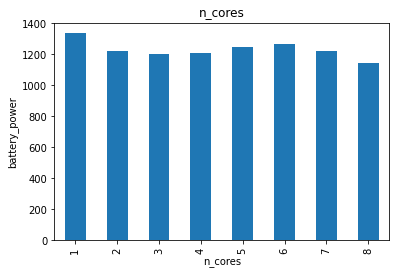

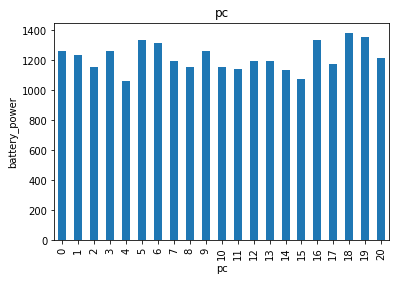

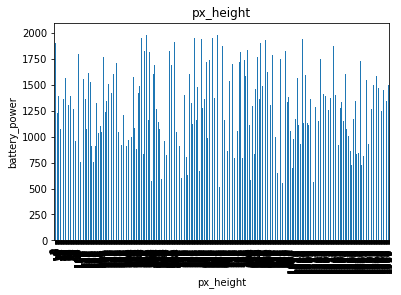

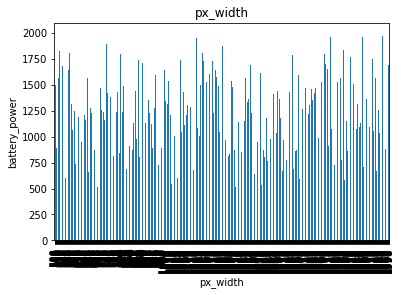

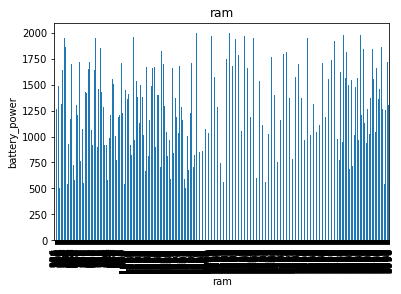

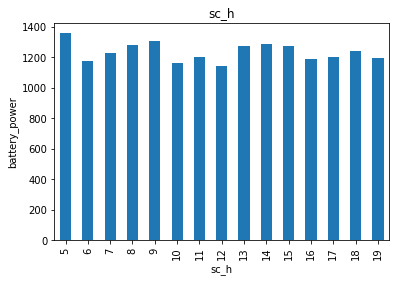

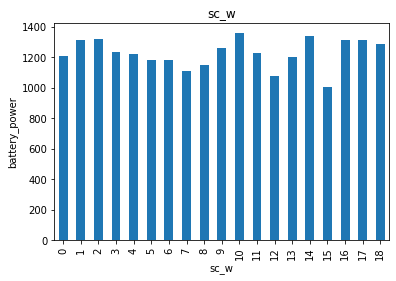

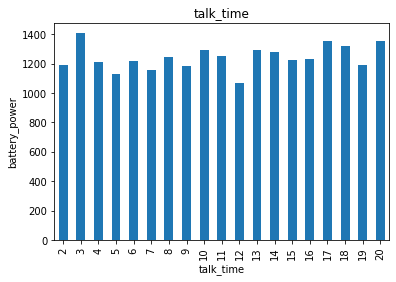

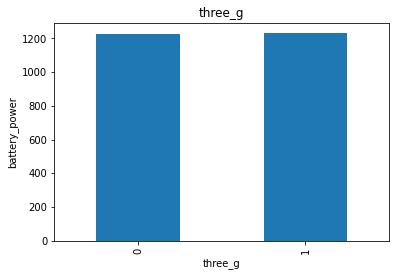

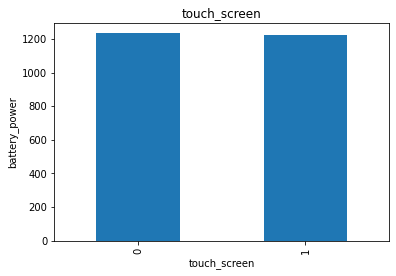

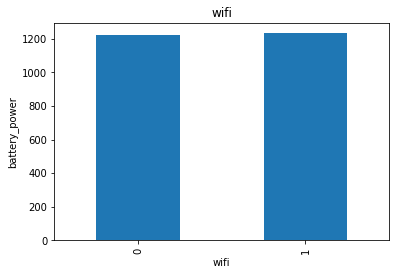

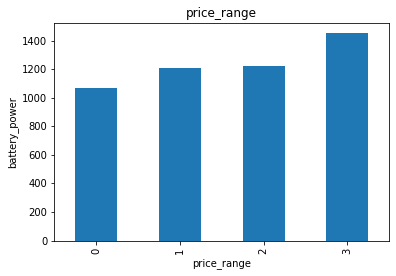

In [ ]:
for feature in numerical_features:
    data=dataset.copy()
    data.groupby(feature)['battery_power'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('battery_power')
    plt.title(feature)
    plt.show()

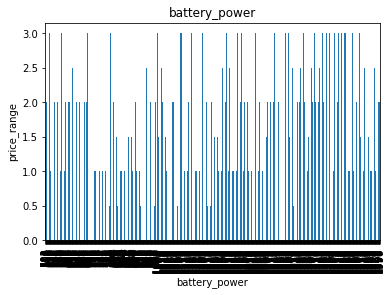

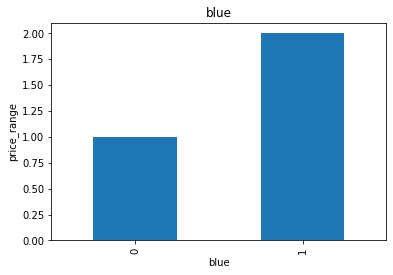

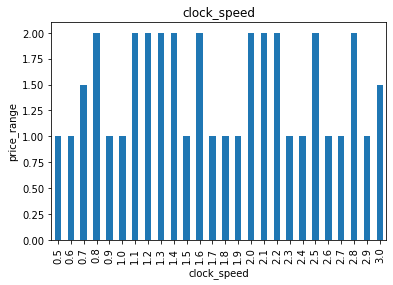

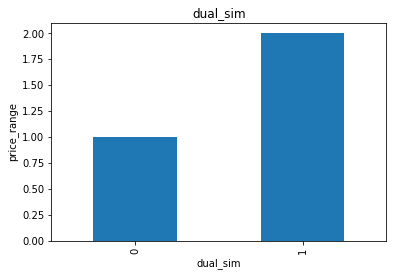

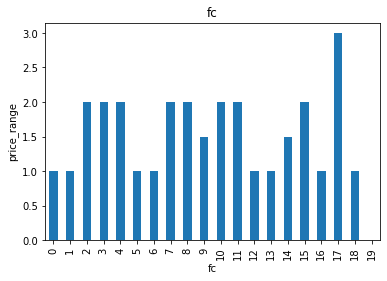

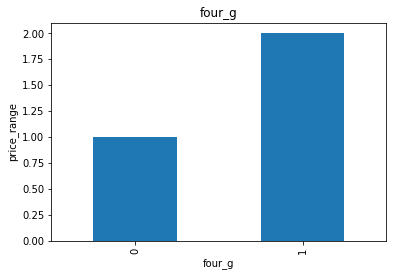

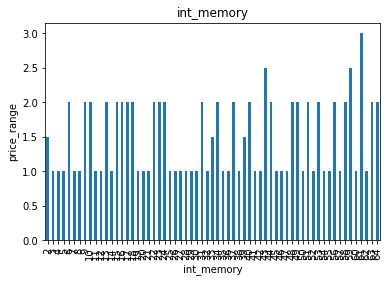

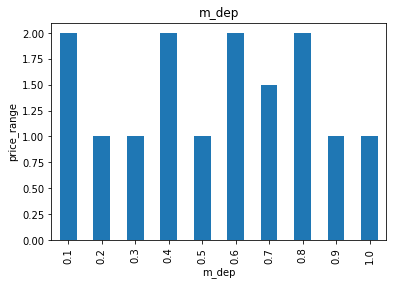

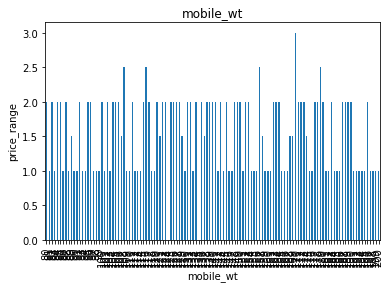

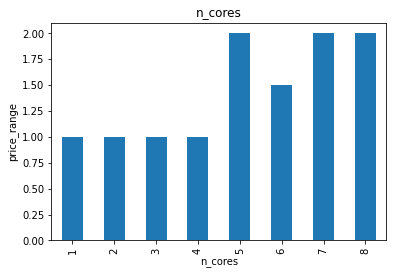

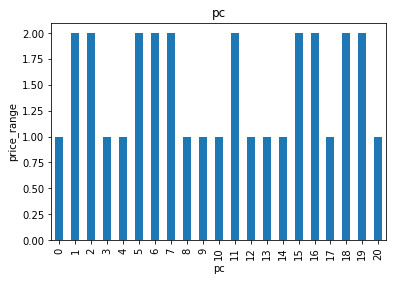

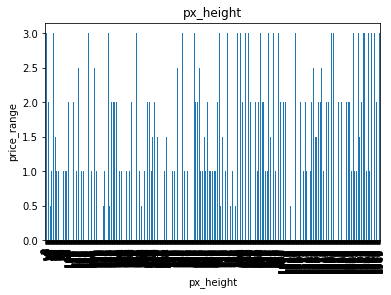

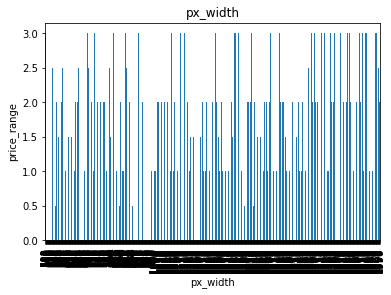

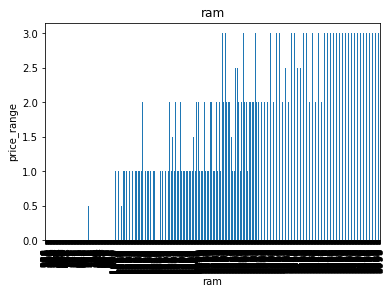

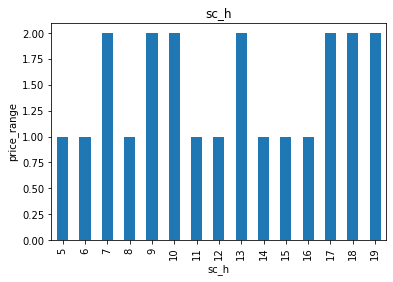

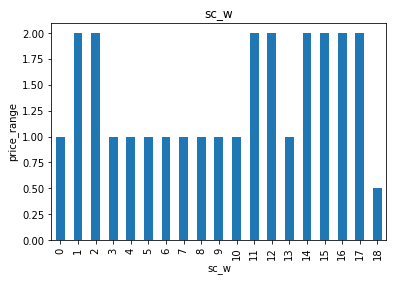

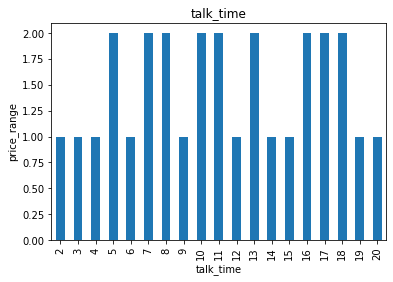

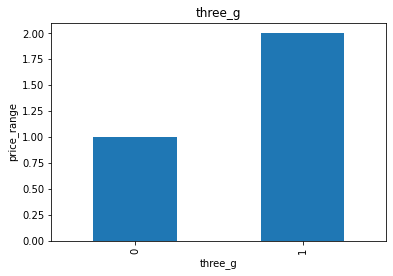

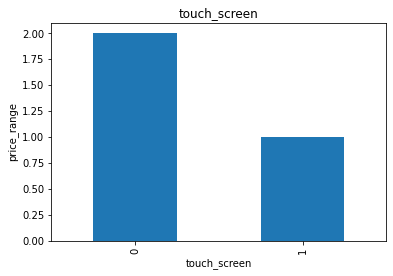

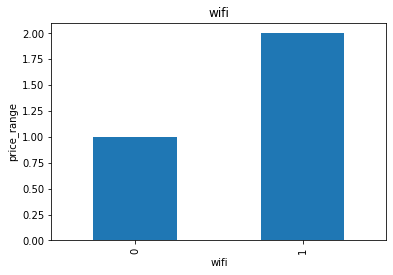

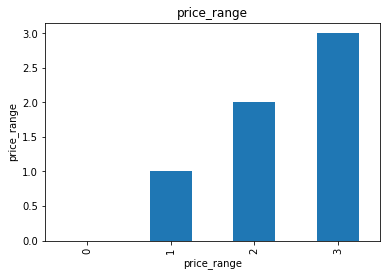

In [ ]:

for feature in numerical_features:
    data=dataset.copy()
    data.groupby(feature)['price_range'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price_range')
    plt.title(feature)
    plt.show()

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+px_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


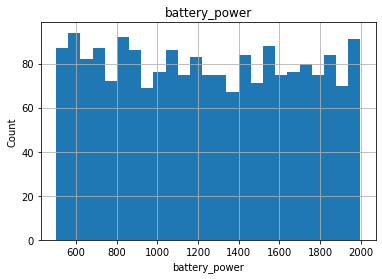

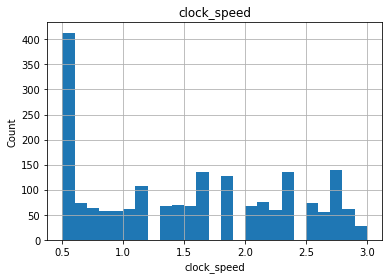

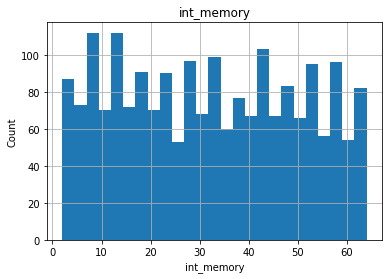

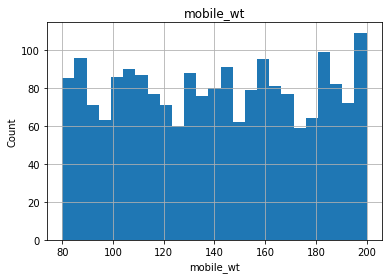

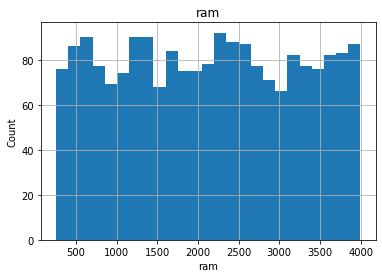

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

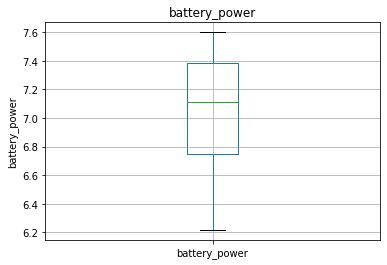

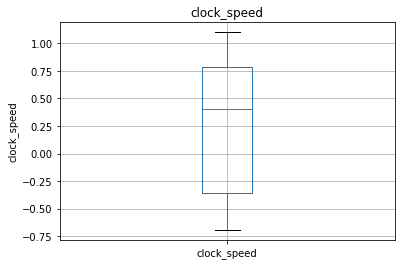

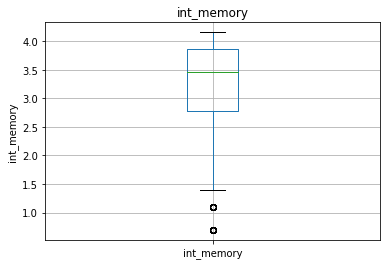

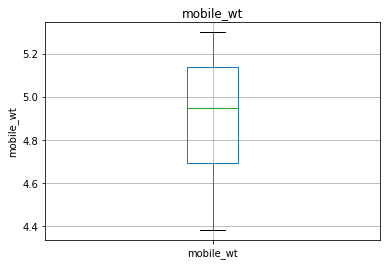

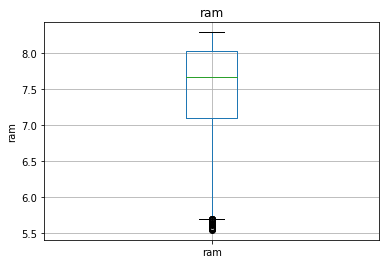

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

[]